## Chapter 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 6.4 (Kalman filter - Perfect model scenario)

In [12]:
dt = 0.01
Nout = 5
dtout = Nout * dt

d = -0.1
b = 1.
Q = 1.
R = 1.

# initial analysis mean and variance
m0 = 10.
P0 = 2.
# initial reference
y0 = 10.

STEPS = 10000000

yobs = np.zeros((STEPS))
yref = np.zeros((STEPS))
mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

y = y0

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
        
        # SDE for reference trajectory (eqn 6.14)
        y = y + dt * d * y + dt * b + np.sqrt(2. * dt * Q) * np.random.randn()
        
    yref[j] = y
    yobs[j] = y + np.sqrt(R) * np.random.randn()
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j + 1)
    timef[j] = dtout * j

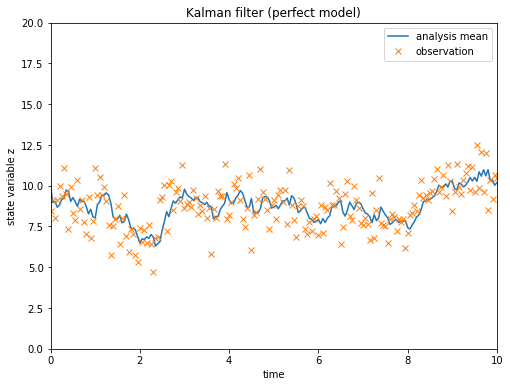

root mean square error = 0.5164
averaged continuously ranked probability score = 0.4120
ratio of y-refs above forecast mean = 0.5004
variance of analysis converges to 0.2666.


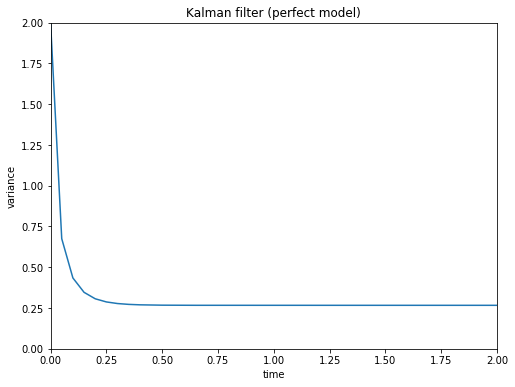

In [13]:
fig0a = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (perfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0b = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (perfect model)")
plt.show()

### Example 6.4 (Kalman filter - Imperfect model scenario)

In [14]:
d = -0.5

mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j+1)
    timef[j] = dtout * j

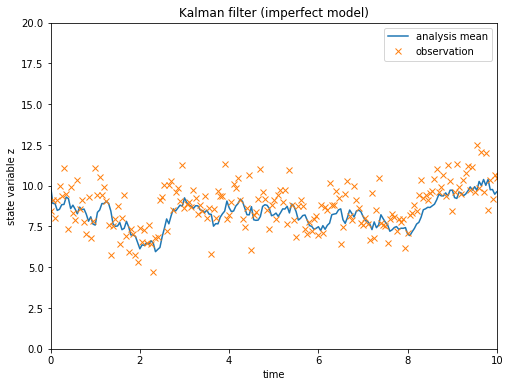

root mean square error = 0.7710
averaged continuously ranked probability score = 0.6361
ratio of y-refs above forecast mean = 0.8711
variance of analysis converges to 0.2530.


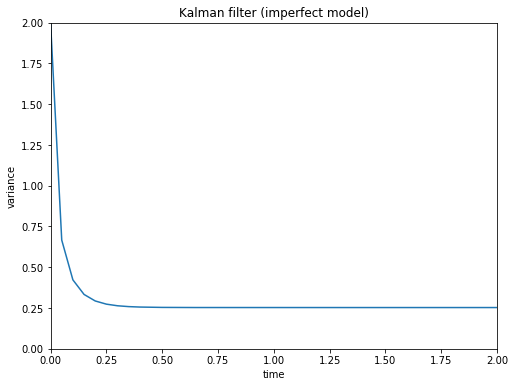

In [15]:
fig0c = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],ma[:1000], '-', label="analysis mean")
plt.plot(timef[:1000],yobs[:1000], 'x', label="observation")
plt.xlabel("time")
plt.ylabel("state variable z")
plt.title("Kalman filter (imperfect model)")
plt.xlim([0,10])
plt.ylim([0,20])
plt.legend()
plt.show()

RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

fig0d = plt.figure(figsize=(8,6))
plt.plot(timea[:1000],Pa[:1000])
plt.xlabel("time")
plt.ylabel("variance")
plt.xlim([0,2])
plt.ylim([0,2])
plt.title("Kalman filter (imperfect model)")
plt.show()

### Example 6.7 (4DVar)

Taken from Chapter 1, Example 8. Lorenz model as a surrogate physical process

In [330]:
sigm = 10.
rho = 28.
beta = 8./3
dt = 0.001
Nout = 50
a = 1. / np.sqrt(dt)
fakt = 1.99999
N = 2 * 10**5

# initial conditions
x = -.587
y = -.563
z = 16.870
g1 = a * (1. / np.sqrt(2.) - .5)
g2 = a * (1. / np.sqrt(3.) - .5)
g3 = a * (1. / np.sqrt(5.) - .5)
res = np.zeros((N,7))

def gi(gi):
    if ((gi >= -a/2) and gi < 0):
        return a * (fakt * gi / a + 0.5)
    else:
        return a * (-fakt * gi / a + 0.5)
        
for i in range(N):
    res[i,:] = [i, x, y, z, g1, g2, g3]
    
    g1 = gi(g1)
    g2 = gi(g2)
    g3 = gi(g3)
    
    xn = x + dt * (sigm * (y - x)) + dt * g1
    yn = y + dt * (x * (rho - z) - y) + dt * g2
    zn = z + dt * (x * y - beta * z) + dt * g3
    
    x, y, z = xn, yn, zn
    
res[:,0] *= dt

# store only points with dt = 0.05
ressug = res[::Nout]

# add measurement error using tent map
meas = np.zeros((N*4,2))
a = 4.
fakt = 1.99999
eta1 = a * (2.**(-1./2) - 0.5)

for i in range(N*4):
    if ((eta1 >= -a/2) and (eta1 < 0)):
        eta1 = (fakt * eta1 + 0.5 * a)
    else:
        eta1 = (-fakt * eta1 + 0.5 * a)
    meas[i] = [i+1, eta1]
    
measerr = meas[:,1][::10]

# observation of x-component (dt = 0.05, first 200 datapoints)
obsx = np.zeros((N/Nout,3))
j = 0
i = 0

for k in range(0,N,Nout):
    err = 1./20 * np.sum(measerr[j:j+20])
    obsx[i] = [res[k,0], res[k,1], err]
    i += 1
    j += 20
    
obsx = np.array(obsx)
obs = [obsx[:,0], obsx[:,1] + obsx[:,2]]
obs = np.array(obs)

In [23]:
# Perform 4DVar
NA = 5
CYCLES = 40
alpha = 0.025

R = 1./15

x0 = -.587
y0 = -.563
z0 = 16.870

x_anal = np.zeros((CYCLES*NA+1))
y_anal = np.zeros((CYCLES*NA+1))
z_anal = np.zeros((CYCLES*NA+1))

rmseX = np.zeros((8))
rmseY = np.zeros((8))
rmseZ = np.zeros((8))
b = np.zeros((8))

for lkl in range(8):
    if lkl == 0:
        delta = 10000.
    elif lkl == 1:
        delta = 100.
    else:
        delta = 8.*1./2**(lkl-2.)
    
    KS = 1
    x_fg = np.copy(x0)
    y_fg = np.copy(y0)
    z_fg = np.copy(z0)
    
    for lll in range(CYCLES):
        x = np.zeros((NA+1))
        y = np.zeros((NA+1))
        z = np.zeros((NA+1))
        t = np.zeros((NA+1))
        
        xb = x_fg
        yb = y_fg
        zb = z_fg
        
        x[0] = np.copy(x_fg)
        y[0] = np.copy(y_fg)
        z[0] = np.copy(z_fg)
        t[0] = 0.
        
        vareps = 1.
        ll = 1
        W = []
        
        while vareps >= 1e-2:
            JAC = np.eye(3)
            H = np.array([1, 0, 0])
            dV = np.zeros((3,NA))
            r = np.zeros((NA))
            
            for j in range(NA):
                xh = x[j]
                yh = y[j]
                zh = z[j]
                
                for i in range(Nout):
                    xo = xh
                    yo = yh
                    zo = zh
                    
                    xh = xo + dt * 10. * (yo-xo)
                    yh = yo + dt * (xo * (28. - zo) - yo)
                    zh = zo + dt * (xo * yo - 8./3 * zo)
                    
                    # Get the Jacobian of the current iteration
                    DF = np.array([[-10., 10., 0.],[28. - zo, -1., -xo],[yo, xo, -8./3]])
                    
                    # Update step for the Jacobian
                    JAC = np.dot((np.eye(3) + dt * DF) , JAC)
                    
                x[j+1] = xh
                y[j+1] = yh
                z[j+1] = zh
                
                # Calculate residual: (forward map of reference - yobs)
                r[j] = xh - obs[1,j+KS]
                #print(r)
                # Gradient of the objective functional for each observation time-step
                dV[:,j] = np.dot(JAC.T,H.T*r[j])
                #print(dV)
                t[j+1] = dt * Nout * (j+1)
                
            # Objective functional
            W.append(.5 * np.sum(r**2) + .5 * ((x[0] - xb)**2 + (y[0] - yb)**2 + (z[0] - zb)**2) / delta)
            # Gradient of the objective functional over a data assimilation cycle
            dW = np.sum(dV, axis=1) + np.hstack((x[0] - xb, y[0] - yb, z[0] - zb)) / delta
            
            # Gradient descent method - want this to converge to < 1e-2.
            vareps = np.linalg.norm(dW)
            ll += 1 # Can remove this counter - unused.

            x[0] -= alpha * dW[0]
            y[0] -= alpha * dW[1]
            z[0] -= alpha * dW[2]
            
        x_anal[KS-1:KS+NA] = x
        y_anal[KS-1:KS+NA] = y
        z_anal[KS-1:KS+NA] = z

        x_fg = x[-1]
        y_fg = y[-1]
        z_fg = z[-1]

        KS = KS+NA

    print(lkl)
    
    rmseX[lkl] = np.sqrt(np.mean((ressug[:KS,1] - x_anal[:KS])**2))
    rmseY[lkl] = np.sqrt(np.mean((ressug[:KS,2] - y_anal[:KS])**2))
    rmseZ[lkl] = np.sqrt(np.mean((ressug[:KS,3] - z_anal[:KS])**2))
    b[lkl] = delta

0
1
2
3
4
5
6
7


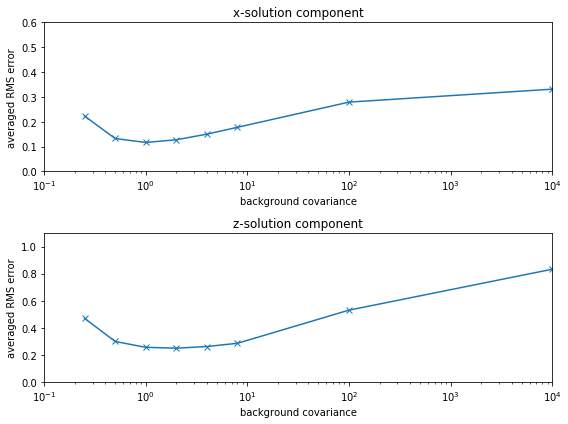

In [26]:
fig1 = plt.figure(figsize=(8,6))
ax = fig1.add_subplot(2, 1, 1)
ax.semilogx(b,rmseX,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("x-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,0.6])

ax = fig1.add_subplot(2, 1, 2)
ax.semilogx(b,rmseZ,'-x')
ax.set_xlabel("background covariance")
ax.set_ylabel("averaged RMS error")
ax.set_title("z-solution component")
ax.set_xlim([0.1,10000])
ax.set_ylim([0.0,1.1])
plt.tight_layout()
plt.show()

### Example 6.9 (Sequential importance sampling (SIS) filter)

First run the cell from Example 6.7 for the Lorenz model as a surrogate process.

In [199]:
STEPS = 40 # 40 windows of observations
R = 1./15

# recall that from example 4.8, the Lorenz model with drift term f(x) set to zero can be modelled 
# by a stochastic difference equation with mean = 0, var = 0.0838.
var = 0.0838
sigma = 0.1

m = np.zeros((5))
rmse_x = np.zeros((5))
rmse_y = np.zeros((5))
rmse_z = np.zeros((5))
effective = np.zeros((5,STEPS+1))

for lkl in range(5):
    if lkl == 0:
        m[lkl] = 10
    else:
        m[lkl] = 10**(lkl+1)
    
    # ensemble size
    M = m[lkl].astype(int)

    # initial PDF is Gaussian with var = 0.1, mean = (x0,y0,z0)
    x = x0 + np.sqrt(sigma) * np.random.randn(M)
    y = y0 + np.sqrt(sigma) * np.random.randn(M)
    z = z0 + np.sqrt(sigma) * np.random.randn(M)
    t = np.zeros((STEPS+1))
    
    weights = 1./M * np.ones((M))
    
    x_f = np.zeros((STEPS+1))
    y_f = np.zeros((STEPS+1))
    z_f = np.zeros((STEPS+1))
    
    x_f[0] = np.dot(weights.T,x)
    y_f[0] = np.dot(weights.T,y)
    z_f[0] = np.dot(weights.T,z)
    
    rmse_x[lkl] = 0.
    rmse_y[lkl] = 0.
    rmse_z[lkl] = 0.
    
    effective[lkl,0] = 1. / np.sum(weights**2)

    for j in range(STEPS):
        xh = x
        yh = y
        zh = z
        
        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh

            # step within each observation window by means of the stochastiv Lorenz-63 model
            xh = xo + dt * 10. * (yo-xo) + np.sqrt(dt * var) * np.random.randn(M)
            yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn(M)
            zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn(M)

        # Calculate residual: (forward map of reference - yobs)
        r = xh - obs[1,j+1]
        # Update weights according to equation 6.29
        weights = np.exp(-r**2 / (R * 2.)) * weights
        weights /= np.sum(weights)

        x = xh
        y = yh
        z = zh
        
        x_f[j+1] = np.dot(weights.T,x)
        y_f[j+1] = np.dot(weights.T,y)
        z_f[j+1] = np.dot(weights.T,z)
        t[j+1] = dt * Nout * (j+1)
    
        rmse_x[lkl] = rmse_x[lkl] + (x_f[j+1] - ressug[j+1,1])**2
        rmse_y[lkl] = rmse_y[lkl] + (y_f[j+1] - ressug[j+1,2])**2
        rmse_z[lkl] = rmse_z[lkl] + (z_f[j+1] - ressug[j+1,3])**2

        effective[lkl,j+1] = 1./np.sum(weights**2)
        
    rmse_x[lkl] = np.sqrt(rmse_x[lkl] / STEPS)
    rmse_y[lkl] = np.sqrt(rmse_y[lkl] / STEPS)
    rmse_z[lkl] = np.sqrt(rmse_z[lkl] / STEPS)

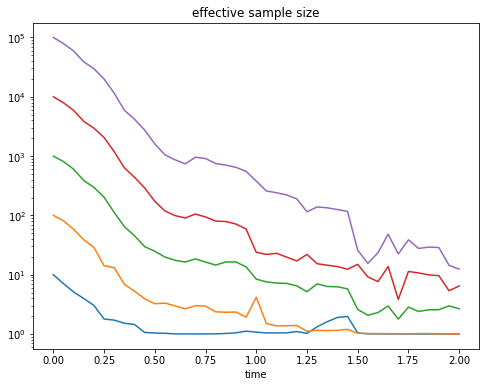

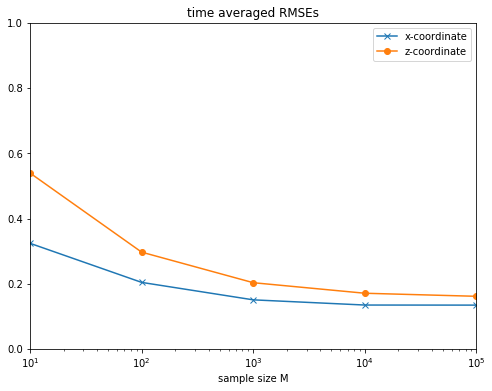

In [200]:
fig2a = plt.figure(figsize=(8,6))
plt.semilogy(t,effective.T)
plt.xlabel("time")
plt.title("effective sample size")
plt.show()

fig2b = plt.figure(figsize=(8,6))
plt.semilogx(m,rmse_x, '-x', label="x-coordinate")
plt.semilogx(m,rmse_z, '-o', label="z-coordinate")
plt.xlabel("sample size M")
plt.title("time averaged RMSEs")
plt.xlim([10,100000])
plt.ylim([0,1.0])
plt.legend()
plt.show()

### Example 6.11 (Sequential importance resampling (SIR) filter)

#### Residual resampling algorithm
1. Determine the number of copies for each ensemble member with $floor(Mw_i)>0,$
$$ N_0 = \sum_i floor(M w_i). $$
2. Populate the multinomial distribution $A$ with these copies, $A \in \mathbb{R}^{d \times N_0},$
```
    k = 0
    for i in M:
        for i in len(floor(M*wi):
            A[:,k] = X[:,i]
            k += 1
```
3. Determine remaining number of copies to make, correspoindg to $floor(Mw_i)<0,$
$$ N_1 = M - N_0. $$
4. Populate the remaining multinomial distribution $B$ with these copies, $B \in \mathbb{R}^{d \times N_1},$
    * Get cumulative distribution of $floor(Mw_i)<0$, (wcu),
        $$ \text{cumsum} \left( \frac{Mw_i - floor(Mw_i)}{\sum_i Mw_i - floor(Mw_i)} \right).$$
    * Get cumulative distribution of $U[0,1]$, (u).
    * ```
    if N_1 > 0:
        k = 0
        for i in N_1:
            while (wcu[k] < u[i]):
                k += 1
            ind[:,i] = k
        B = X[:,ind]
      ```
    * For each ensemble member chosen to be copied, its cumulative weight has to be greater than a sample of a uniform distribution. This ensures that 
    $$ \sum_j^k M w_j - floor(M w_j) > u, \quad u \in [0,1].$$
5. The required resampling follows a distribution corresponding to
    $$ C = A + B, \quad C \in \mathbb{R}^{d \ times M}. $$
    Each member of this new ensemble has equal weight corresponding to
    $$ w_i = \frac{1}{M}. $$

In [318]:
# define residual resampling function
def resampling(X,w,M,J):
    wm = M*w
    wi = np.floor(wm)
    nc = np.sum(wi).astype(int)

    A = np.zeros((J,nc))
    X = X.reshape(J,-1)
    
    if (nc > 0):
        k = 0
        for i in range(M):
            for j in range(int(wi[i])):
                #if j > 0:
                A[:,k] = X[:,i]
                k += 1
    else:
        A = np.zeros((J,0))
        
    wmd = wm - wi
    wmd /= np.sum(wmd)
    Nk = M - nc
    
    B = np.zeros((J,Nk))
    
    if (Nk > 0):
        exponent = 1./(np.arange(1,Nk+1)[::-1]).astype(float)
        u = np.cumprod(np.power(np.random.rand(Nk),exponent))
        u = u[::-1]

        wcu = np.cumsum(wmd)
        
        ind = np.zeros((Nk)).astype(int)
        kk = 0
        
        for ll in range(Nk):
            while (wcu[kk] < u[ll]):
                kk += 1
                
            ind[ll] = kk
        B = X[:,ind]
        
    else:
        B = np.zeros((J,0))

    return A, B

In [331]:
STEPS = 5*40 # 40 windows of observations
R = 1./15

# recall that from example 4.8, the Lorenz model with drift term f(x) set to zero can be modelled 
# by a stochastic difference equation with mean = 0, var = 0.0838.
var = 0.0838
sigma = 0.1

NN = 6
m = np.zeros((NN))
rmse_x = np.zeros((NN))
rmse_y = np.zeros((NN))
rmse_z = np.zeros((NN))
effective = np.zeros((NN,STEPS+1))

m = np.arange(50,300+50,50)

for lkl in range(NN):
    
    # ensemble size
    M = m[lkl]
    
    x0 = -.587
    y0 = -.563
    z0 = 16.870
    
    # initial PDF is Gaussian with var = 0.1, mean = (x0,y0,z0)
    x = x0 + np.sqrt(sigma) * np.random.randn(M)
    y = y0 + np.sqrt(sigma) * np.random.randn(M)
    z = z0 + np.sqrt(sigma) * np.random.randn(M)
    t = np.zeros((STEPS+1))
    
    weights = 1./M * np.ones((M))
    
    x_f = np.zeros((STEPS+1))
    y_f = np.zeros((STEPS+1))
    z_f = np.zeros((STEPS+1))
    
    x_f[0] = np.dot(weights.T,x)
    y_f[0] = np.dot(weights.T,y)
    z_f[0] = np.dot(weights.T,z)

    rmse_x[lkl] = 0.
    rmse_y[lkl] = 0.
    rmse_z[lkl] = 0.
    
    effective[lkl,0] = 1. / np.sum(weights**2)

    for j in range(STEPS):
        xh = x
        yh = y
        zh = z
        
        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh

            # step within each observation window by means of the stochastiv Lorenz-63 model
            xh = xo + dt * 10. * (yo - xo) + np.sqrt(dt * var) * np.random.randn(M)
            yh = yo + dt * (xo * (28. - zo) - yo) + np.sqrt(dt * var) * np.random.randn(M)
            zh = zo + dt * (xo * yo - 8./3 * zo) + np.sqrt(dt * var) * np.random.randn(M)

        # Calculate residual: (forward map of reference - yobs)
        r = xh - obs[1,j+1]
        
        # Update weights according to equation 6.29
        weights = np.exp(-r**2 / (R * 2.)) * weights
        weights /= np.sum(weights)

        x = xh
        y = yh
        z = zh
        
        x_f[j+1] = np.dot(weights,x)
        y_f[j+1] = np.dot(weights,y)
        z_f[j+1] = np.dot(weights,z)
        t[j+1] = dt * Nout * (j+1)
    
        rmse_x[lkl] = rmse_x[lkl] + (x_f[j+1] - ressug[j+1,1])**2
        rmse_y[lkl] = rmse_y[lkl] + (y_f[j+1] - ressug[j+1,2])**2
        rmse_z[lkl] = rmse_z[lkl] + (z_f[j+1] - ressug[j+1,3])**2

        effective[lkl,j+1] = 1. / np.sum(weights**2)
        
        # introduce a resampling step (residual resampling)
        if (effective[lkl,j+1] < M/2.):
            X = np.vstack((x,y,z))
            A, B = resampling(X,weights,M,3)
            
            # reinitialise weights to be equal
            weights = 1./M * np.ones(M)

            x = np.hstack((A[0,:],B[0,:])).T
            y = np.hstack((A[1,:],B[1,:])).T
            z = np.hstack((A[2,:],B[2,:])).T
        
    rmse_x[lkl] = np.sqrt(rmse_x[lkl] / STEPS)
    rmse_y[lkl] = np.sqrt(rmse_y[lkl] / STEPS)
    rmse_z[lkl] = np.sqrt(rmse_z[lkl] / STEPS)

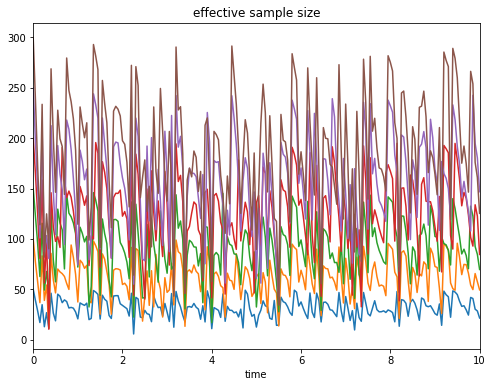

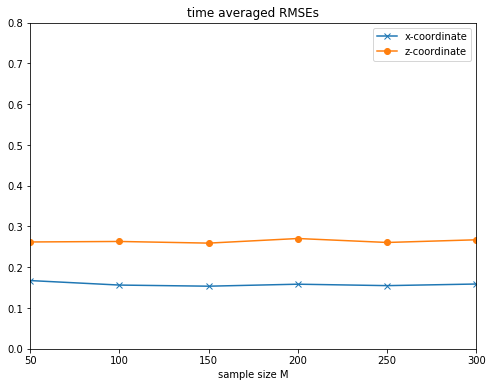

In [332]:
fig3a = plt.figure(figsize=(8,6))
plt.plot(t,effective.T)
plt.xlabel("time")
plt.title("effective sample size")
plt.xlim([0,10.])
plt.show()

fig3b = plt.figure(figsize=(8,6))
plt.plot(m,rmse_x, '-x', label="x-coordinate")
plt.plot(m,rmse_z, '-o', label="z-coordinate")

plt.xlabel("sample size M")
plt.title("time averaged RMSEs")
plt.xlim([50,300])
plt.ylim([0,0.8])
plt.legend()
plt.show()

### Example 6.12 (Comparison between SIR filter and Kalman filter in the perfect model scenario)

In [333]:
# copied from Example 6.4 (Kalman filter - Perfect model scenario)
dt = 0.01
Nout = 5
dtout = Nout * dt

d = -0.1
b = 1.
Q = 1.
R = 1.

# initial analysis mean and variance
m0 = 10.
P0 = 2.
# initial reference
y0 = 10.

STEPS = 10000

yobs = np.zeros((STEPS))
yref = np.zeros((STEPS))
mf = np.zeros((STEPS))
timef = np.zeros((STEPS))
Pf = np.zeros((STEPS))

ma = np.zeros((STEPS+1))
timea = np.zeros((STEPS+1))
Pa = np.zeros((STEPS+1))

ma[0] = m0
Pa[0] = P0
timea[0] = 0.

y = y0

for j in range(STEPS):
    m = ma[j]
    P = Pa[j]
    
    for i in range(Nout):
        # get updated mean and variance (eqn 6.7, 6.8)
        m = m + dt * d * m + dt * b
        P = (1. + dt * d)*P*(1. + dt * d) + 2.*dt*Q
        
        # SDE for reference trajectory (eqn 6.14)
        y = y + dt * d * y + dt * b + np.sqrt(2. * dt * Q) * np.random.randn()
        
    yref[j] = y
    yobs[j] = y + np.sqrt(R) * np.random.randn()
    
    # old analysis = new forecast
    mf[j] = m
    Pf[j] = P
    
    # Kalman gain matrix
    K = P / (P+R)
    
    # Kalman filter equations to calculate analsyis at tn = tNobs
    Pa[j+1] = P - K*P
    ma[j+1] = m - K*(m-yobs[j])
    timea[j+1] = dtout * (j + 1)
    timef[j] = dtout * j
    
RMSE = np.sqrt(np.mean((yref-ma[1:])**2))
MCRPS = np.mean(np.abs(yref-ma[1:]))

print("root mean square error = %.4f" %RMSE)
print("averaged continuously ranked probability score = %.4f" %MCRPS)

ind = np.where(yref > mf)
print("ratio of y-refs above forecast mean = %.4f" %(float(ind[0].shape[0])/STEPS))
print("variance of analysis converges to %.4f." %Pa[-1])

root mean square error = 0.5084
averaged continuously ranked probability score = 0.4085
ratio of y-refs above forecast mean = 0.4987
variance of analysis converges to 0.2666.


In [338]:
# SIR for the perfect model scenario
Msteps = 4
m = np.array([10.**(i+1) for i in range(Msteps)])

PF = np.zeros((Msteps, STEPS+1))
PF[:,0] = P0

rmse_x = np.zeros((Msteps))
effective = np.zeros((Msteps,STEPS+1))

for lkl in range(Msteps):
    # ensemble size
    M = int(m[lkl])
    
    x = m0 + np.sqrt(P0) * np.random.randn(M)
    
    weights = 1./M * np.ones((M))
    
    x_f = np.zeros((STEPS+1))
    t = np.zeros((STEPS+1))
    
    x_f[0] = np.dot(weights.T,x)

    rmse_x[lkl] = 0.

    effective[lkl,0] = 1. / np.sum(weights**2)

    for j in range(STEPS):
        xh = x
        
        for i in range(Nout):
            xo = xh
            # stochastic difference equation model
            xh = xo + dt * d * xo + dt * b + np.sqrt(2. *  dt * Q) * np.random.randn(M)

        # Calculate residual: (forward map of reference - yobs)
        r = xh - yobs[j]
        
        # Update weights according to equation 6.29
        weights = np.exp(-r**2 / (R * 2.)) * weights
        weights /= np.sum(weights)

        x = xh
        
        x_f[j+1] = np.dot(weights,x)
        t[j+1] = dt * Nout * (j+1)
        
        PF[lkl,j+1] = np.dot(weights.T,(x-x_f[j+1])**2)
    
        rmse_x[lkl] = rmse_x[lkl] + (x_f[j+1] - yref[j])**2

        effective[lkl,j+1] = 1. / np.sum(weights**2)
        
        # introduce a resampling step (residual resampling)
        if (effective[lkl,j+1] < M/2.):
            X = x.T
            A, B = resampling(X,weights,M,1)
            
            # reinitialise weights to be equal
            weights = 1./M * np.ones(M)

            x = np.hstack((A[0,:],B[0,:])).T
        
    rmse_x[lkl] = np.sqrt(rmse_x[lkl] / STEPS)

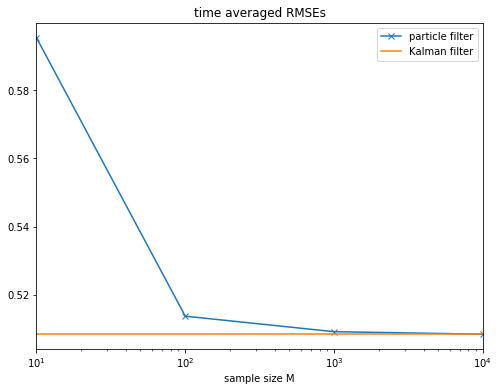

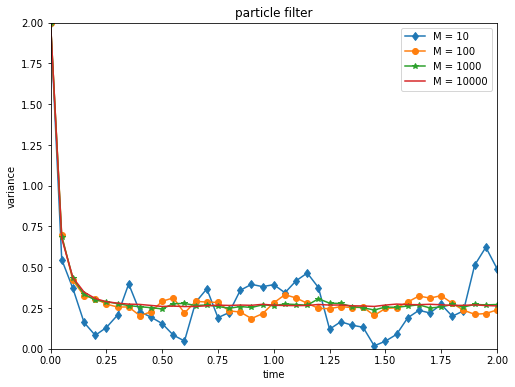

In [340]:
fig4a = plt.figure(figsize=(8,6))
plt.semilogx(m,rmse_x, 'x-', label = "particle filter")
plt.semilogx(m,RMSE*np.ones(m.shape[0]), label = "Kalman filter")
plt.xlabel("sample size M")
plt.title("time averaged RMSEs")
plt.xlim([10,10000])
plt.legend()
plt.show()

fig4b = plt.figure(figsize=(8,6))
ST = 1000
plt.plot(t[:ST], PF[0,:ST], '-d', label="M = 10")
plt.plot(t[:ST], PF[1,:ST], '-o', label="M = 100")
plt.plot(t[:ST], PF[2,:ST], '-*', label="M = 1000")
plt.plot(t[:ST], PF[3,:ST], '-', label="M = 10000")
plt.xlabel("time")
plt.ylabel("variance")
plt.title("particle filter")
plt.xlim([0,2])
plt.ylim([0,2])
plt.legend()
plt.show()